# Linear regression using a salary dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### EXAMPLE MULTIPLE LINEAR REGRESSION

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

# X-values that are 2D
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]]) # 2D array with shape (4,2)

# SAY YOU HAVE AN EQUATION  y = 3 + 1 * x_0 + 2 * x_1 
# COEFFICIENTS OF A MULTIPLE LINEAR REGRESSION is y=b1x1+b2x2 become [1,2]

# PERFORM DOT PRODUCT TO CALCULATE Y axis
y = np.dot(X, np.array([1, 2])) + 3 
print(y)

# PERFORM LINEAR REGREESION to train the model
reg = LinearRegression().fit(X, y)

print(f"Reg score: {reg.score(X, y)}")        # R² score
print(f"Reg coeff: {reg.coef_}")              # Estimated coefficients (slopes)
print(f"Reg intercept: {reg.intercept_}")         # Estimated intercept (bias)
print(f"Reg predict {reg.predict(np.array([[3, 5]]))}")  # Prediction for new data

[ 6  8  9 11]
Reg score: 1.0
Reg coeff: [1. 2.]
Reg intercept: 3.0000000000000018
Reg predict [16.]


In [4]:
df = pd.read_csv("Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [5]:
def data_cleaning(df_salary_data):
    duplicates =  df_salary_data[df_salary_data.duplicated()]
    null_summary = df_salary_data.isnull().sum()
    return duplicates

data_cleaning(df)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [6]:
# function that drop duplicated values
def data_cleaning(data):
    duplicates = data[data.duplicated()]
    data_cln = data.drop_duplicates()
    data_cln = data.dropna()
    return data_cln

df_cln = data_cleaning(df)
df_cln

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [7]:
# checking data types
df_cln.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Here we Define x and y as the columns YearsExperience and Salary
we then split the data 80/20 into testing and training sets

In [8]:
X = df_cln['Years of Experience'].values.reshape(-1,1) # -1 calculates the number of rows for you
y = df_cln['Salary'].values

# Convert X to a 2D array by reshaping to (-1,1)

In [9]:

# Training & testing the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression() # A class from sklearn.linear_model used for simple or multiple linear regression
model.fit(X_train, y_train) # this line trains the linear regression model using the training data

LinearRegression()

Predict salaries based on the test features using the trained model.

In [11]:
y_pred = model.predict(X_test) # this line uses the trained model to make predictions on the test data

Evaluate the model 

In [12]:
mse = mean_squared_error(y_test, y_pred) # lower -> better, mean squared error between the actual values (y_test) and predicted values (y_pred)
r2 = r2_score(y_test, y_pred) # r squared value (1 perfect fit)

print(f'Mean Squared Error: {mse}') 
print(f'R^2 Score: {r2}')

Mean Squared Error: 982050061.9154329
R^2 Score: 0.6555973709206211


### Linear Regression Graph

Place the Test data into a scatter plot and include the predicted regression line

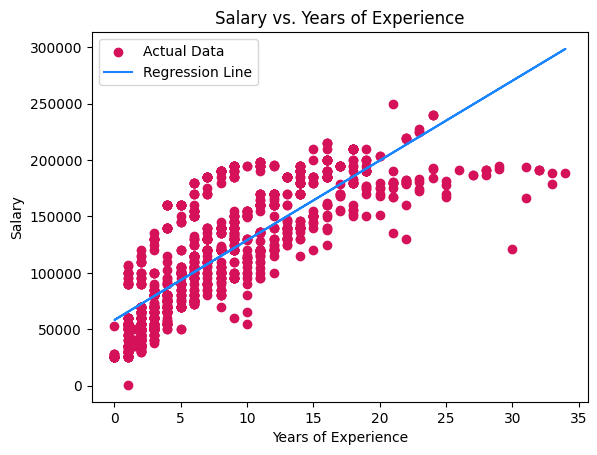

In [13]:
plt.scatter(X_test, y_test, color='#D41159', label='Actual Data') # Scatter plot of the actual test data
plt.plot(X_test, y_pred, color='#1A85FF', label='Regression Line') # predicted regression line using the model's predictions
plt.title('Salary vs. Years of Experience') # Title of the plot
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend() # shows the legend in the plot using the labels from earlier
plt.show()

In [17]:
# predict the salary for 50+ years of experience
years_of_experience = [[100]]

y_pred = model.predict(years_of_experience) 
print(y_pred)

[765482.37932004]
